# Large Value Fund Category Analysis: IWD vs SCHD vs VYM vs DGRO

This analysis compares the top 4 Large Value funds (Dividend ETFs) by fund size (in billions - USD). Those index funds are:<br />

IWD - iShares Russell 1000 Value ETF - 0.19% annual expense ratio<br />
SCHD - Schwab U.S. Dividend Equity ETF - 0.06% annual expense ratio<br />
VYM - Vanguard High Dividend Yield Index Fund - 0.06% annual expense ratio<br />
DGRO - iShares Core Dividend Growth ETF - 0.08% annual expense ratio<br />

<br />
The statistical models check the following:<br />
1. Average volume of shares or index funds' units traded with respect to time<br />
2. Highest/Lowest/Open index fund prices traded with respect to time<br />
3. Market Capitalization<br />
4. Trends using moving averages - Do shares tend to increase in the long term?<br />
5. Stock Returns & Volatility - for Annualized & Daily Returns<br />
6. Correlation<br />

<br />
Morningstar fund definitions:<br /> 
1. Large Growth Funds are defined as those that invest in large-sized companies projected to grow fast. These tend to have high volatility, and high valuations (high price ratios & low dividend yields). These are known for being ‘high risk but high reward’.<br />
2. Large Value Funds are defined as those that invest in large-sized companies that have slow growth and low valuations (low price ratios and high dividend yields).<br />
3. Large Blend Funds are defined as those that invest in a combination of large Value & large Growth. These funds represent the overall U.S. Stock market and invest in across the spectrum of U.S. industries.<br />

# Step 1 - Import Libraries & Download Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Dates range from 06/12/2014 to 12/29/2023 for IWD, SCHD, VYM & DGRO

In [2]:
# Define start & end dates, then import data from Yahoo Finance
# Top 4 Large Value Fund ETFs are IWD, SCHD, VYM & DGRO
# As in today (December 11, 2023) these ETFs continue to grow

start = "2014-06-12"
end = "2023-12-29"

# Get Data
iwd = yf.download("IWD", start, end)
schd = yf.download("SCHD", start, end)
vym = yf.download("VYM", start, end)
dgro = yf.download("DGRO", start, end)

# Correlation data compilation for 'Step 12'
tickers = ['IWD', 'SCHD', 'VYM', 'DGRO']
data = yf.download(tickers, start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [ ]:
# Display ivv to verify no errors in download
iwd

In [ ]:
# Display schd to verify no errors in download
schd

In [ ]:
# Display vym to verify no errors in download
vym

In [ ]:
# Display dgro to verify no errors in download
dgro

# Step 2 - Summarize the Data Frames  - Get Statistics

In [3]:
# Define a function to obtain necessary info. for each ETF
def get_info(dataframe):
    etf_info =pd.DataFrame({
                    'Datatype': dataframe.dtypes,                                      # Columns' data type
                    'Total_Element': dataframe.count(),                                # Total elements in column
                    'Null_Count': dataframe.isnull().sum(),                            # Total null values
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100   # Null values %
    })
    return etf_info  

In [4]:
# Call the function to see datatypes from each column of Yahoo Finance's data
get_info(iwd)
get_info(schd)
get_info(vym)
get_info(dgro)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,2404,0,0.0
High,float64,2404,0,0.0
Low,float64,2404,0,0.0
Close,float64,2404,0,0.0
Adj Close,float64,2404,0,0.0
Volume,int64,2404,0,0.0


In [5]:
# IWD's basic stats
iwd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2.404000e+03
mean,126.955250,127.604900,126.235878,126.953270,115.197522,2.375031e+06
std,22.059770,22.182150,21.949759,22.064942,26.771500,1.381591e+06
min,87.419998,88.019997,84.110001,85.169998,72.884422,5.215000e+05
25%,105.927500,106.287500,105.427500,105.867502,89.651260,1.439075e+06
50%,122.750000,123.294998,121.985001,122.750000,109.580971,2.025850e+06
75%,149.845001,150.622498,148.752502,149.755005,145.584190,2.885875e+06
max,170.720001,171.419998,169.759995,170.509995,165.699997,1.280630e+07


In [6]:
# SCHD's basic stats
schd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2.404000e+03
mean,55.384888,55.660250,55.067920,55.385441,48.270722,1.497868e+06
std,14.130961,14.225067,14.025436,14.130327,16.260943,1.339174e+06
min,34.590000,35.549999,31.750000,34.630001,26.337437,6.830000e+04
25%,42.695001,42.785001,42.500000,42.664999,33.507240,4.842250e+05
50%,51.750000,51.995001,51.419998,51.725000,43.741856,9.762500e+05
75%,71.145000,71.652502,70.754999,71.257500,68.219250,2.282275e+06
max,82.050003,82.480003,81.559998,81.940002,76.320000,1.091690e+07


In [7]:
# VYM's basic stats
vym.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2.404000e+03
mean,86.604068,87.016327,86.122895,86.601273,75.436338,1.282978e+06
std,15.046933,15.144381,14.972062,15.056897,19.287956,8.894387e+05
min,61.380001,61.860001,48.049999,60.849998,46.424374,1.358000e+05
25%,73.027498,73.195000,72.757502,73.037500,57.802712,7.049250e+05
50%,84.680000,85.110001,84.175003,84.680000,72.048153,1.050400e+06
75%,102.630003,103.137499,102.094997,102.545000,97.043377,1.608625e+06
max,115.169998,115.660004,114.510002,115.010002,111.830002,1.020690e+07


In [8]:
# DGRO's basic stats
dgro.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2.404000e+03
mean,38.004373,38.179173,37.785454,37.994070,34.429697,1.156099e+06
std,9.768071,9.835816,9.719364,9.780847,10.897168,1.362182e+06
min,23.700001,23.860001,22.750999,23.709999,19.318964,1.200000e+03
25%,28.190001,28.219999,28.078750,28.150000,23.581408,2.575750e+05
50%,36.520000,36.683001,36.320000,36.500000,32.394283,1.012050e+06
75%,48.845000,49.182000,48.423749,48.815001,46.951607,1.647775e+06
max,56.150002,56.424999,55.830002,56.060001,53.900002,3.116650e+07


# Step 3 - Comparison of Funds (Average Volume of Units Traded)

In [9]:
# Find the average of the volume of ETFs traded over time for each ETF.
# Round off the value.
iwd_vol_avg = round(iwd["Volume"].mean())
schd_vol_avg = round(schd["Volume"].mean())
vym_vol_avg = round(vym["Volume"].mean())
dgro_vol_avg = round(dgro["Volume"].mean())

# Convert results in array
vol_avg = np.array([iwd_vol_avg, schd_vol_avg, vym_vol_avg, dgro_vol_avg])

In [10]:
# Print
iwd_note = "Average volume for IWD is: " + str(vol_avg[0])
schd_note = "Average volume for SCHD is: " + str(vol_avg[1])
vym_note = "Average volume for VYM is: " + str(vol_avg[2])
dgro_note = "Average volume for DGRO is: " + str(vol_avg[3])

In [11]:
iwd_note

'Average volume for IWD is: 2375031'

In [12]:
schd_note

'Average volume for SCHD is: 1497868'

In [13]:
vym_note

'Average volume for VYM is: 1282978'

In [14]:
dgro_note

'Average volume for DGRO is: 1156099'

### Look at the pie chart below - note that IWD has the highest trading volume (2.4M), followed by SCHD (1.5M), VYM (1.3M) and then DGRO (1.2M)

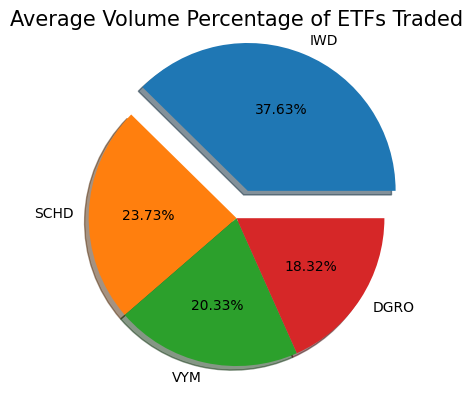

In [15]:
# Create a pie chart
# Set labels
mylabels = ["IWD", "SCHD", "VYM", "DGRO"]
myexplode = [0.2, 0, 0, 0] # To create exploding wedge

#Set data points & graph
plt.pie(vol_avg, labels=mylabels, explode=myexplode, shadow=True, autopct='%1.2f%%')
plt.title('Average Volume Percentage of ETFs Traded', fontsize=15);

# Step 4 - Visualize the Trade Volume over Time

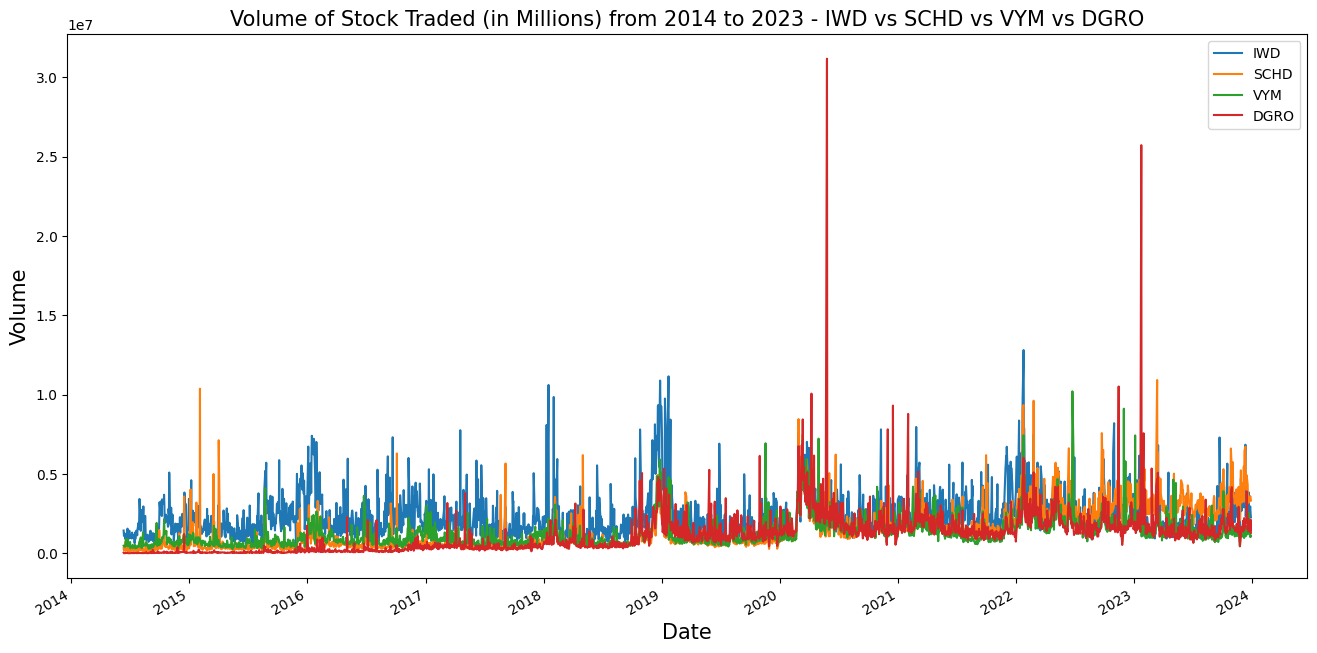

In [16]:
# Perform the visualization in a single graph
# Set data points
iwd['Volume'].plot(label='IWD', figsize=(16,8))
schd['Volume'].plot(label='SCHD')
vym['Volume'].plot(label='VYM')
dgro['Volume'].plot(label='DGRO')

# Set graph
plt.title('Volume of Stock Traded (in Millions) from 2014 to 2023 - IWD vs SCHD vs VYM vs DGRO', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.legend();

### The graph (IWD vs SCHD vs VYM vs DGRO) shows that DGRO clearly has a few noticeable spikes (or outlying cases) that surpass the rest during 2020 & early 2023 when it comes to trading volume. Overrall, IWD has plenty of spikes or variation in its trade volume as well.

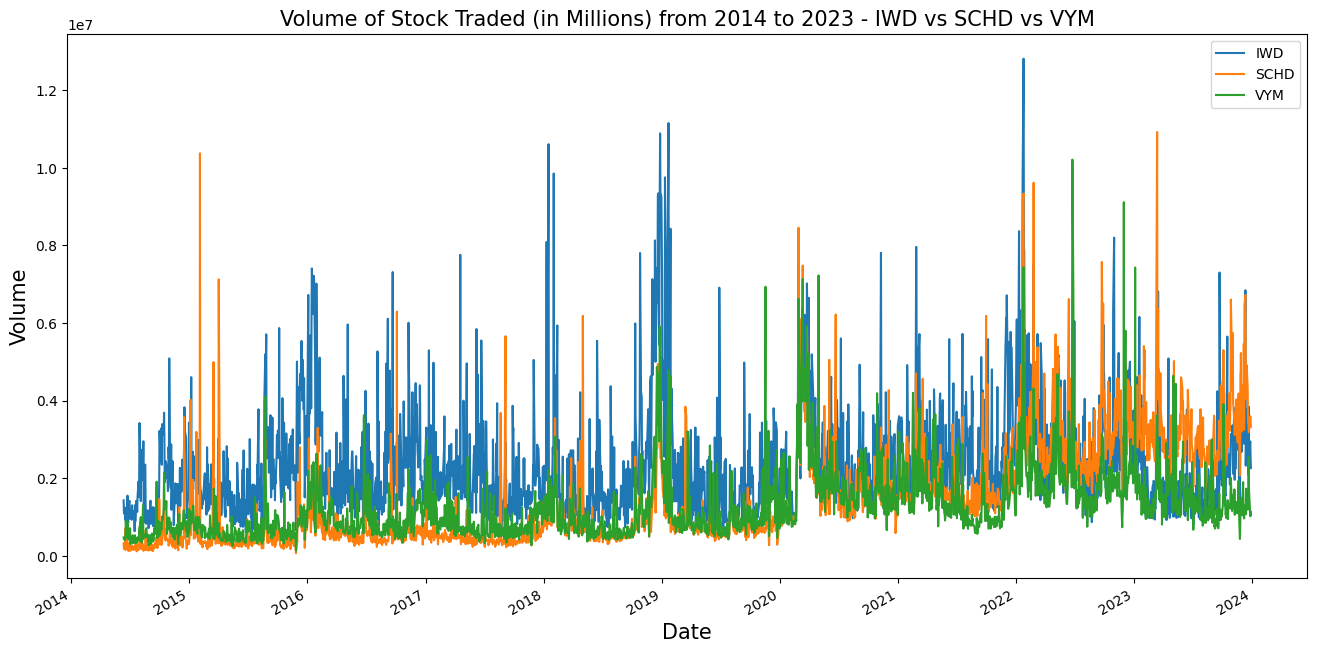

In [17]:
# Perform the visualization in a single graph
# Set data points
iwd['Volume'].plot(label='IWD', figsize=(16,8))
schd['Volume'].plot(label='SCHD')
vym['Volume'].plot(label='VYM')

# Set graph
plt.title('Volume of Stock Traded (in Millions) from 2014 to 2023 - IWD vs SCHD vs VYM', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.legend();

### The graph (IWD vs SCHD vs VYM) is the same as the previous, however we exclude DGRO as its outliers were visually affecting the rest of the graph.

# Step 5 - Find the Highest Price (in USD) of ETFs Traded with Time

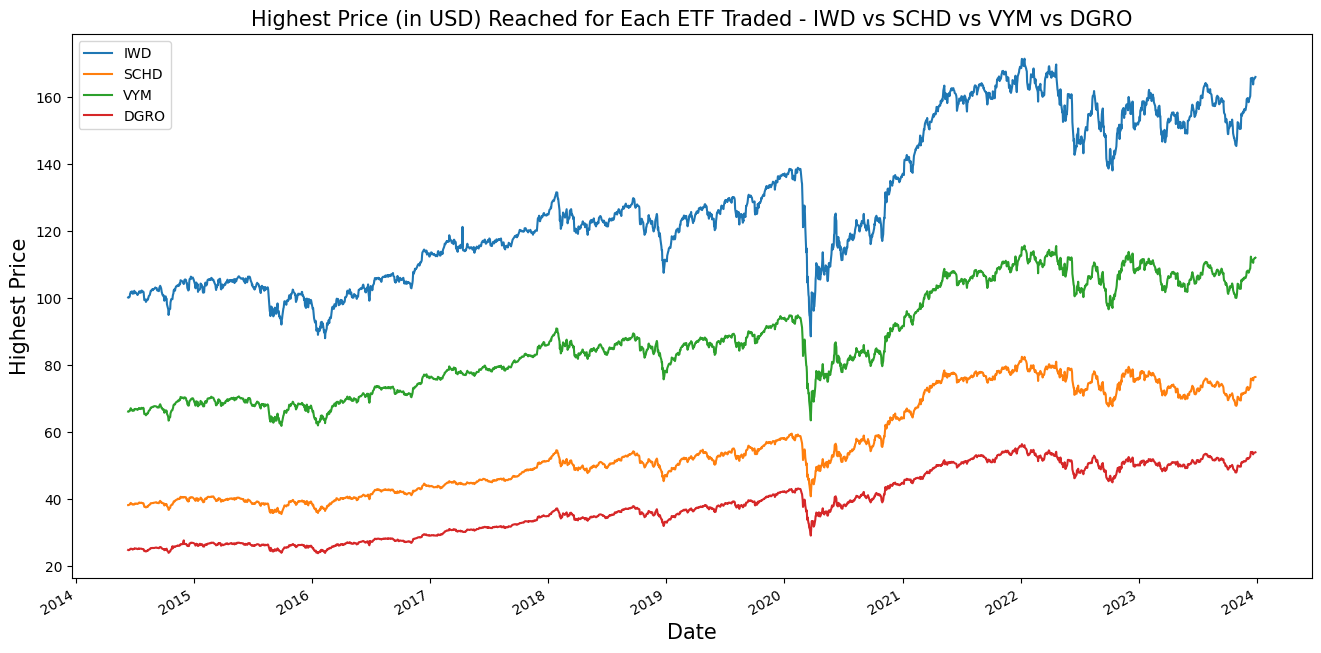

In [18]:
# Perform the visualization in a single graph
# Set data points
iwd['High'].plot(label = 'IWD', figsize = (16,8)) 
schd['High'].plot(label = 'SCHD') 
vym['High'].plot(label = 'VYM')
dgro['High'].plot(label = 'DGRO')

# Set graph
plt.title('Highest Price (in USD) Reached for Each ETF Traded - IWD vs SCHD vs VYM vs DGRO', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Highest Price', fontsize=15)
plt.legend();

# Step 6 - Find the Lowest Price (in USD) of ETFs Traded with Time

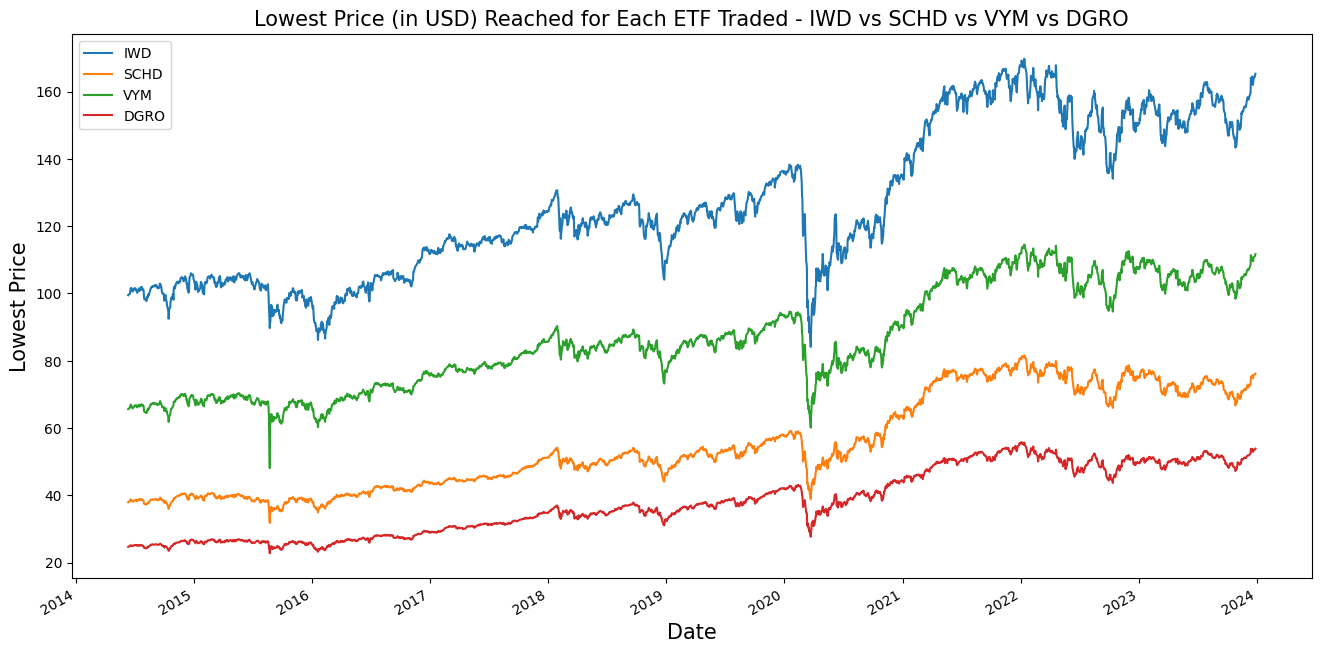

In [19]:
# Perform the visualization in a single graph
# Set data points
iwd['Low'].plot(label = 'IWD', figsize = (16,8)) 
schd['Low'].plot(label = 'SCHD') 
vym['Low'].plot(label = 'VYM')
dgro['Low'].plot(label = 'DGRO')

# Set graph
plt.title('Lowest Price (in USD) Reached for Each ETF Traded - IWD vs SCHD vs VYM vs DGRO', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Lowest Price', fontsize=15)
plt.legend();

# Step 7 - Find the Open Price (in USD) of ETFs Traded with Time

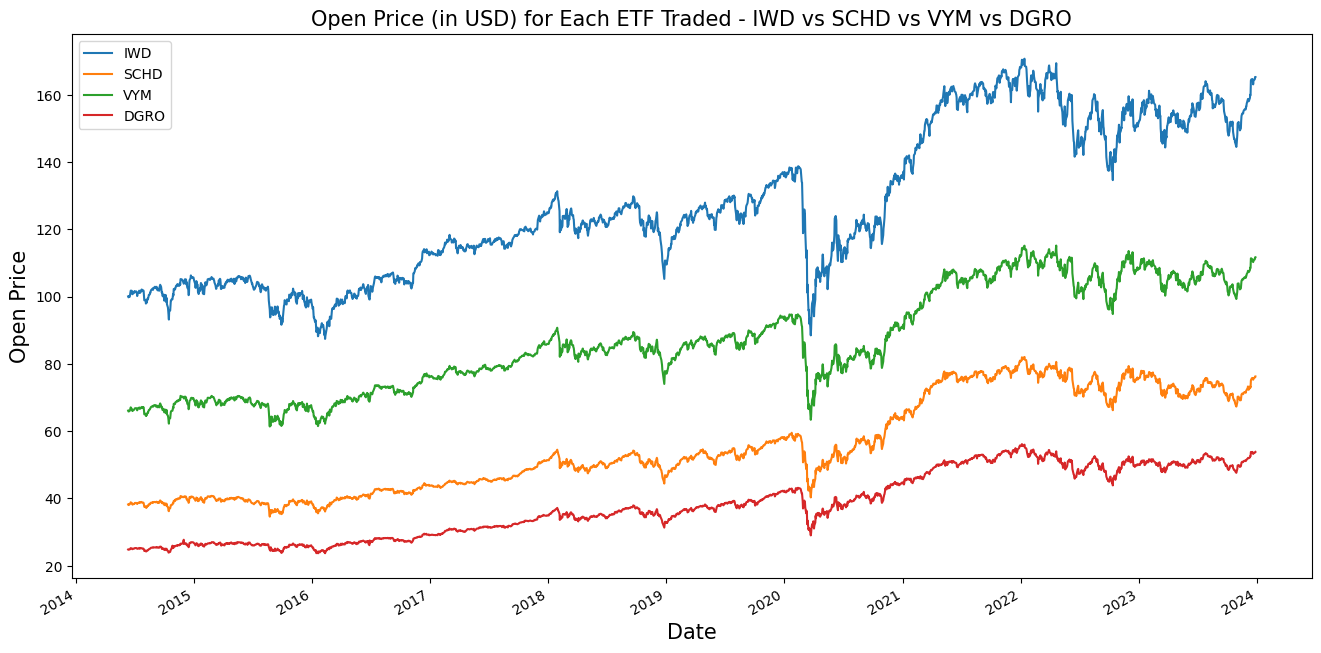

In [20]:
# Perform the visualization in a single graph
# Set data points
iwd['Open'].plot(label = 'IWD', figsize = (16,8)) 
schd['Open'].plot(label = 'SCHD') 
vym['Open'].plot(label = 'VYM')
dgro['Open'].plot(label = 'DGRO')

# Set graph
plt.title('Open Price (in USD) for Each ETF Traded - IWD vs SCHD vs VYM vs DGRO', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Open Price', fontsize=15)
plt.legend();

# Step 8 - Market Capitalization

This gives the value of an ETF that is traded in the stock market. This allows investors to understand how valuable the index fund is perceived.
The size and value of an ETF gives the level of risk one might expect when investing in it, as well as how much an investment might return over time.
It is found by calculating the product of the total number of shares with the present price of shares.

M_Cap = Total Number of Shares * Present Shares Price


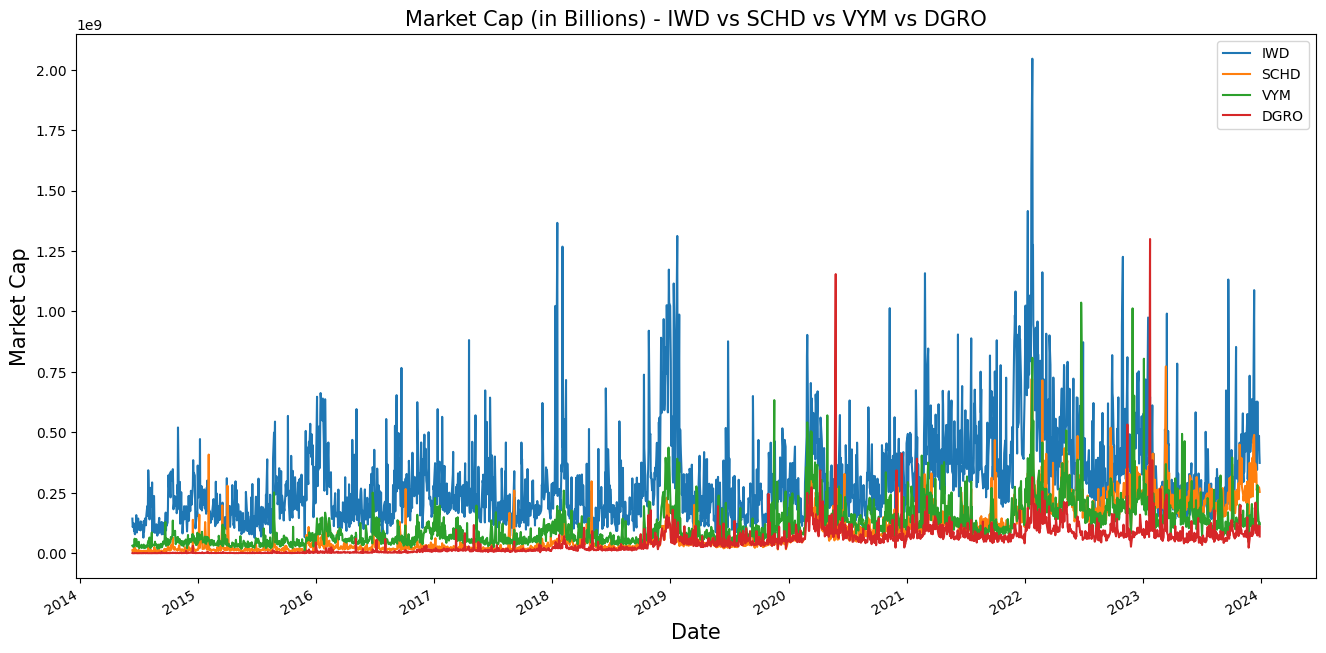

In [21]:
# Perform the visualization in a single graph
# Do math to get M_Cap
iwd['M_Cap'] = iwd['Open'] * iwd['Volume']
schd['M_Cap'] = schd['Open'] * schd['Volume']
vym['M_Cap'] = vym['Open'] * vym['Volume']
dgro['M_Cap'] = dgro['Open'] * dgro['Volume']

# Set data points
iwd['M_Cap'].plot(label = 'IWD', figsize = (16,8)) 
schd['M_Cap'].plot(label = 'SCHD') 
vym['M_Cap'].plot(label = 'VYM')
dgro['M_Cap'].plot(label = 'DGRO')

# Set graph
plt.title('Market Cap (in Billions) - IWD vs SCHD vs VYM vs DGRO', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)
plt.legend();

### For the given data, we can see that IWD provides greater returns over time because it has a higher price per share in general and it's trading volume is the highest among the 4 ETFs.

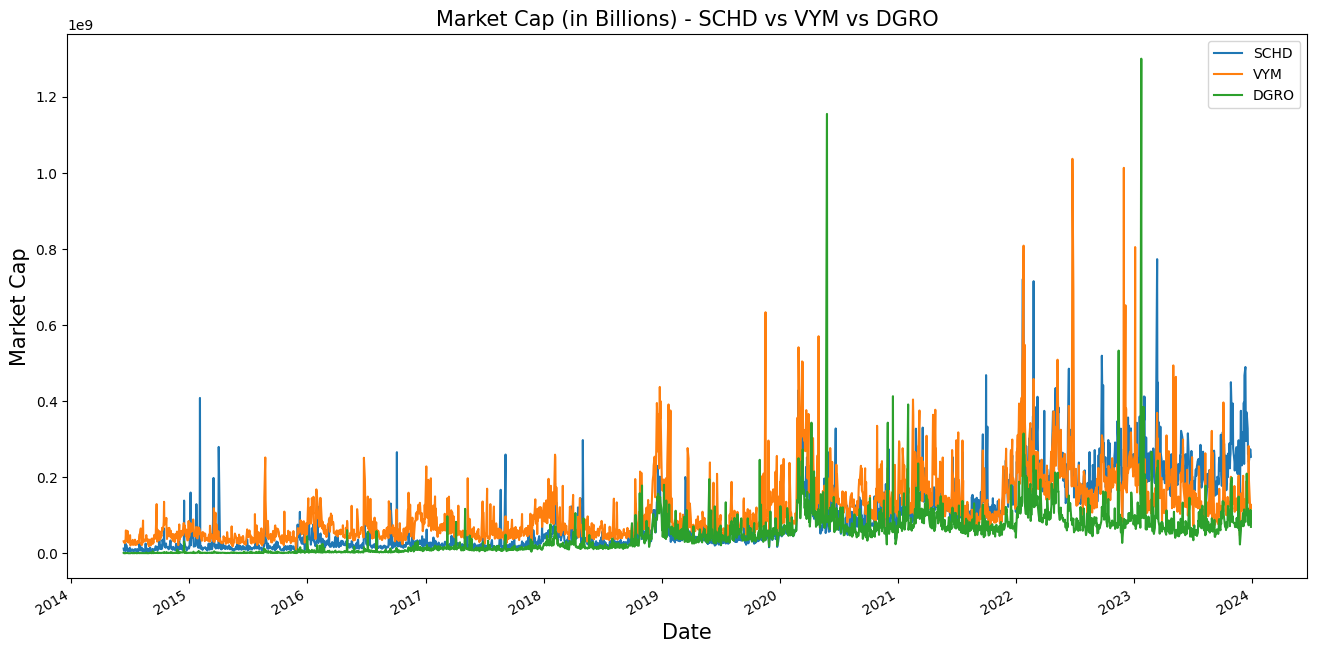

In [22]:
# Perform the visualization in a single graph
# Set data points
schd['M_Cap'].plot(label = 'SCHD', figsize = (16,8)) 
vym['M_Cap'].plot(label = 'VYM') 
dgro['M_Cap'].plot(label = 'DGRO')

# Set graph
plt.title('Market Cap (in Billions) - SCHD vs VYM vs DGRO', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)
plt.legend();

### For the given data (IWD excluded), we can see that SCHD has an overall greater Market Cap compared to VYM & DGRO in recent years, this can be seen more clearly in the 2023-2024 segment as SCHD's numbers in the Y-axis get higher as time passed by. In addition DGRO provides less returns over time, followed by VYM. If we compare SCHD with VYM, VYM is more diversified / larger (meaning that it includes more companies or holdings that don't necessarily perform as well), while SCHD has only a high concentration percentage on a few selected top holdings (hence better performance is expected). In the case of DGRO, this fund is smaller in size (assets) and it's concentration is in 400 holdings, unlike SCHD which has only 106 top performing companies. 

# Step 9 - Moving Averages: Determine if the Funds have Significant Upward Trends

Moving Averages are used to deal with price fluctuations, since ETF prices change rapidly over time. In general, an upward trend in a moving average (bull market) might imply an increase in the price or momentum of a security, while a downward trend (bear market) would be seen as a decline.

We can use the help of 50-day and 200-day averages to look for trends. The 200-day moving average is considered especially significant in stock/ETF trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend.

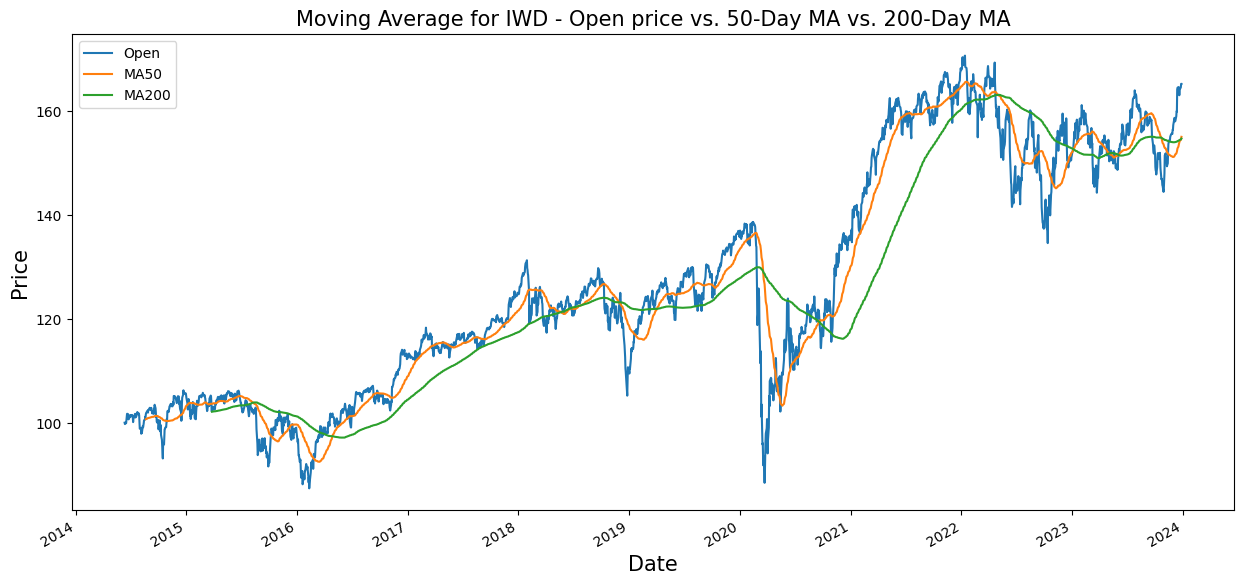

In [23]:
# Perform the visualization on moving average
iwd['MA50'] = iwd['Open'].rolling(50).mean() 
iwd['MA200'] = iwd['Open'].rolling(200).mean()

# Set data points
iwd['Open'].plot(figsize = (15,7))
iwd['MA50'].plot()
iwd['MA200'].plot()

# Set graph
plt.title('Moving Average for IWD - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

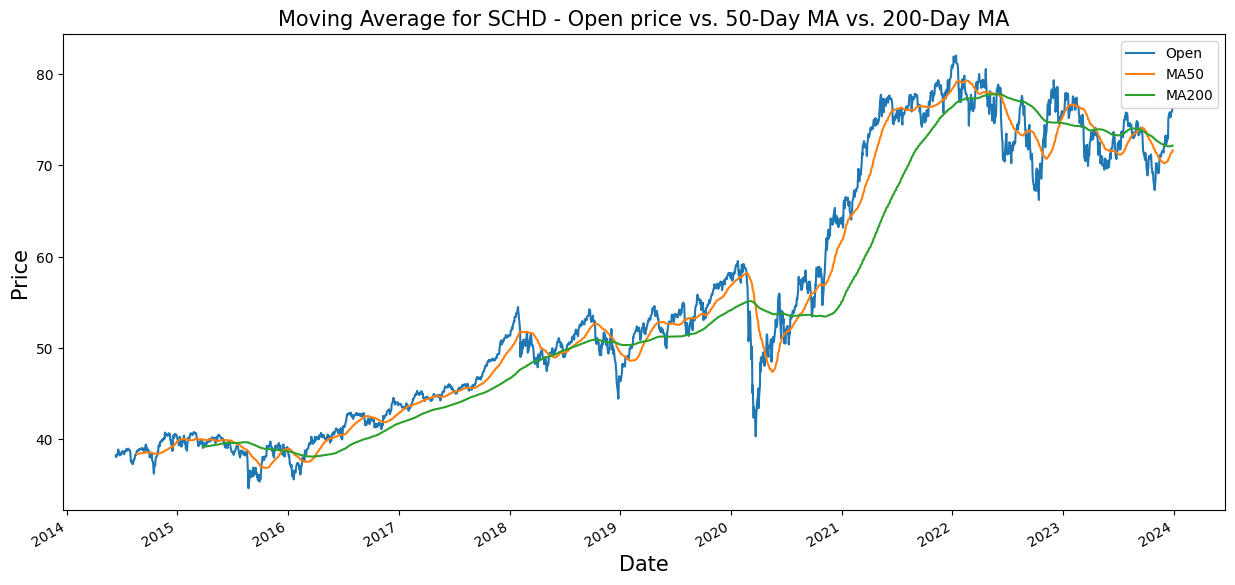

In [24]:
# Perform the visualization on moving average
schd['MA50'] = schd['Open'].rolling(50).mean() 
schd['MA200'] = schd['Open'].rolling(200).mean()

# Set data points
schd['Open'].plot(figsize = (15,7))
schd['MA50'].plot()
schd['MA200'].plot()

# Set graph
plt.title('Moving Average for SCHD - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

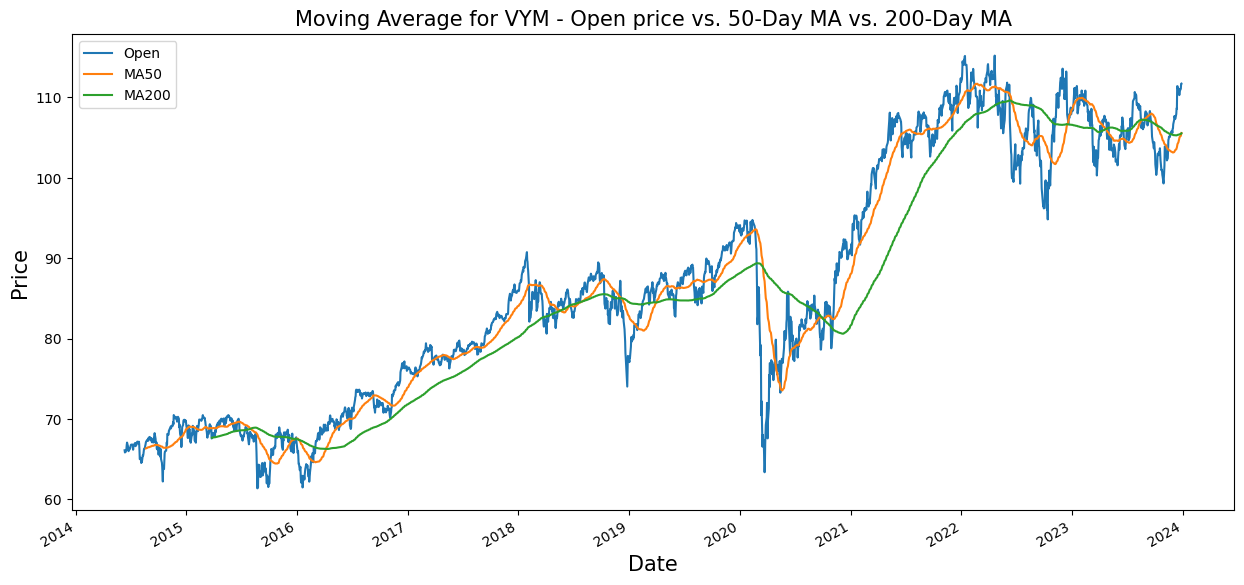

In [25]:
# Perform the visualization on moving average
vym['MA50'] = vym['Open'].rolling(50).mean() 
vym['MA200'] = vym['Open'].rolling(200).mean()

# Set data points
vym['Open'].plot(figsize = (15,7))
vym['MA50'].plot()
vym['MA200'].plot()

# Set graph
plt.title('Moving Average for VYM - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

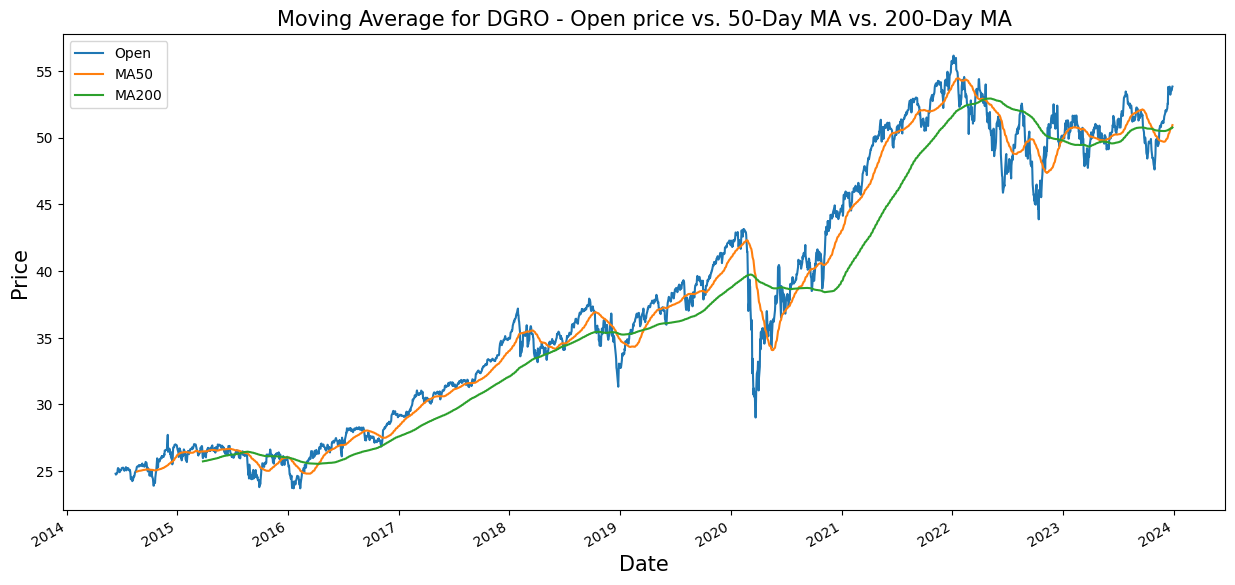

In [26]:
# Perform the visualization on moving average
dgro['MA50'] = dgro['Open'].rolling(50).mean() 
dgro['MA200'] = dgro['Open'].rolling(200).mean()

# Set data points
dgro['Open'].plot(figsize = (15,7))
dgro['MA50'].plot()
dgro['MA200'].plot()

# Set graph
plt.title('Moving Average for DGRO - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

### Notice that the historical stock market data (9 years of collected data points available in Yahoo Finance) for the 4 ETFs (IWD, SCHD, VYM & DGRO) trend 'upwards', meaning that their prices tend to increase in monetary value with respect to time. Notice that the orange lines or moving averages tend to increase with respect to time as well. Although there will always be economic downturns (such as 2020 when a global pandemic was declared, and during the 1st 2 years of the Ukraine & Russia war) that will cause stock (and hence ETF) prices to decrease, markets eventually recover and prices will not decrease or stagnate in the long run. Although, this year would be consider 'bad' for the top 4 Large Value ETFs.

# Step 10 - Volatility & Stock/ETF Returns

A percentage increase in an index fund or ETF value is the change in that same fund comparing that to the previous day. The bigger the value either positive or negative the volatile the stock or fund is. For instance, an AMAZON share that during day 1, 2, & 3 cost 153.00, 152.63 and 154.03 respectively is less volatile than bitcoin that during day 1, 2, & 3 cost 100.00, 180.23 and suddenly plummets to 40.89 respectively.

The formula for interday return is:
rt = (Pt/Pt-1) - 1, where,
</br>
rt = Return, </br>
Pt = Price at time T (close price of current day), </br>
Pt-1 = Price at time T-1 (close price of the previous day).</br>

Most investors fear volatility, hence stability is preferred. It is essential for our analysis to model the potential range of an investment's possible returns with the appearance of a normal distribution, however stock or ETF returns are statistically not normally distributed - meaning that there will always be many outliers. To describe an investment, we only need to get 3 values: the mean (a.k.a. the investment’s expected return), the standard deviation (a.k.a. the investment’s risk or volatility for daily returns), and annualized volatility.
With the help of histograms, we can find out whether an index fund or ETF is relatively stable.

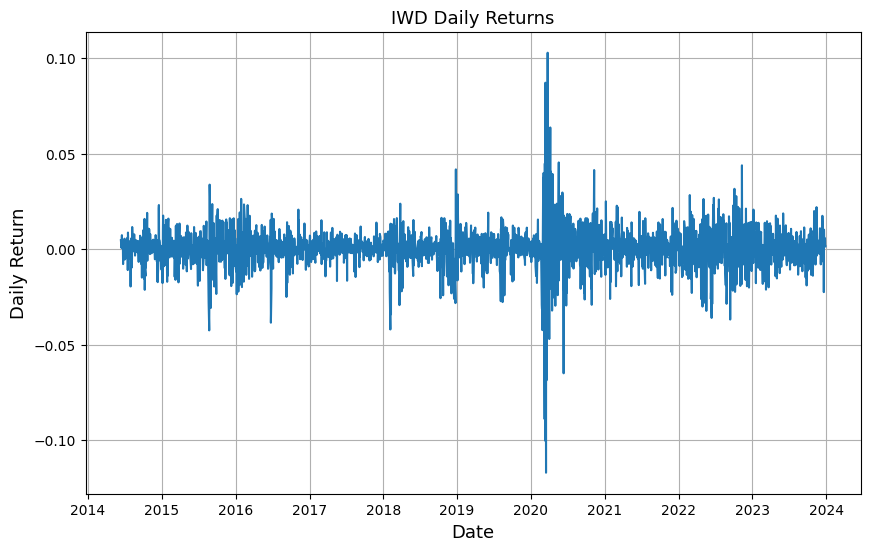

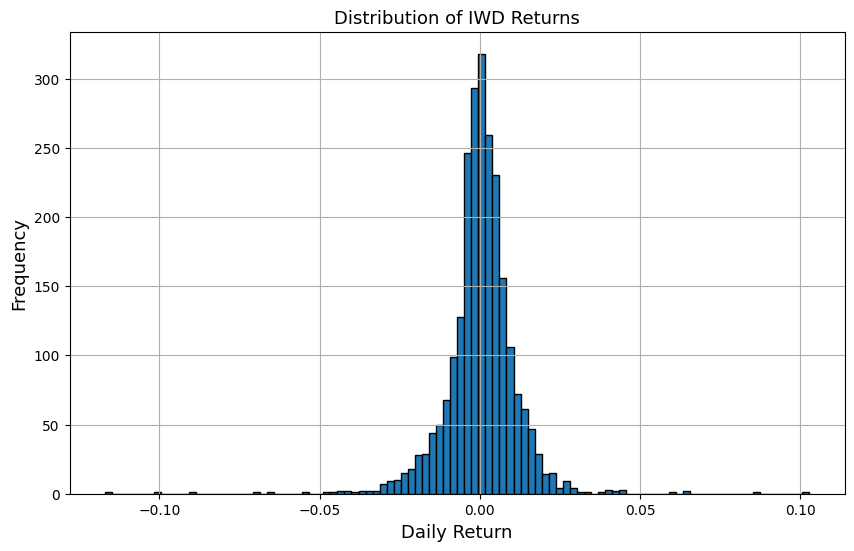

The average expected return percentage for IWD is: 0.00027459616869649953 or 0.0002746
The std or risk (or average volatility for daily returns) percentage for IWD is: 0.011166217665110912 or 0.0111662
The average annualized volatility percentage for IWD: 0.1772582101625987 or 0.1772582


In [27]:
# Perform the visualization in a single graph
iwd['Daily Returns'] = ((iwd['Close']) - (iwd['Close'].shift(1)))/(iwd['Close'].shift(1))
iwd['Daily Returns'] = iwd['Daily Returns'].dropna()

# Volatility
volatility = iwd['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(iwd.index, iwd['Daily Returns'])
plt.title('IWD Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(iwd['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of IWD Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = iwd['Daily Returns'].mean()
sd = iwd['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for IWD is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for IWD is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for IWD: ' + str(av) + ' or ' + str(round(av, 7)))

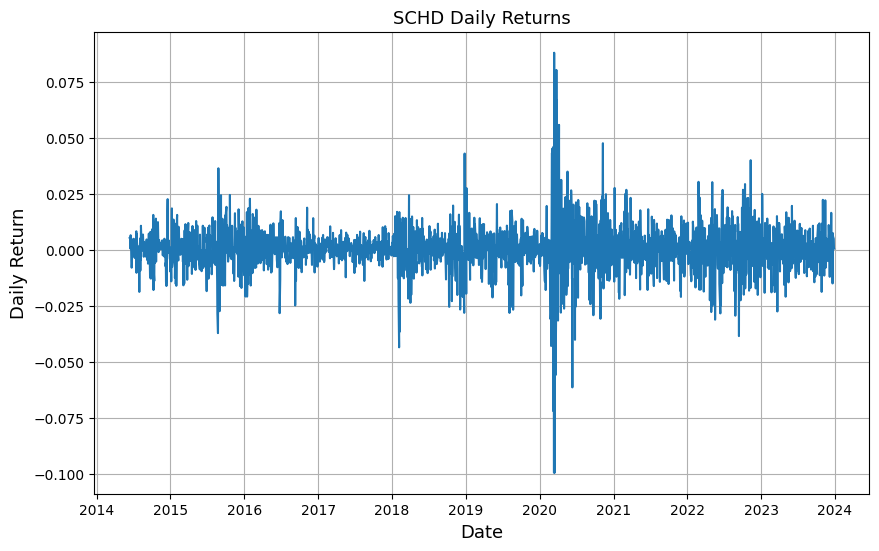

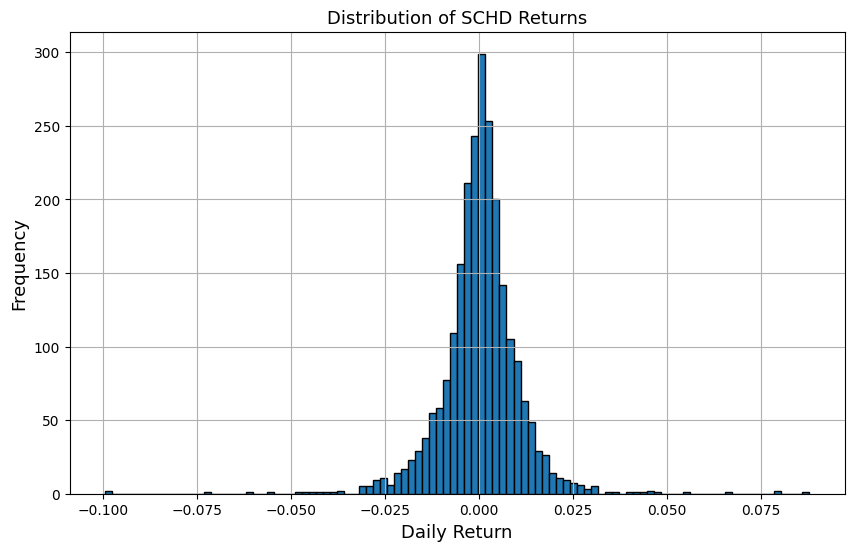

The average expected return percentage for SCHD is: 0.00034767668917763596 or 0.0003477
The std or risk (or average volatility for daily returns) percentage for SCHD is: 0.010673334027065448 or 0.0106733
The average annualized volatility percentage for SCHD: 0.1694339249732323 or 0.1694339


In [28]:
# Perform the visualization in a single graph
schd['Daily Returns'] = ((schd['Close']) - (schd['Close'].shift(1)))/(schd['Close'].shift(1))
schd['Daily Returns'] = schd['Daily Returns'].dropna()

# Volatility
volatility = schd['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(schd.index, schd['Daily Returns'])
plt.title('SCHD Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(schd['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of SCHD Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = schd['Daily Returns'].mean()
sd = schd['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for SCHD is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for SCHD is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for SCHD: ' + str(av) + ' or ' + str(round(av, 7)))

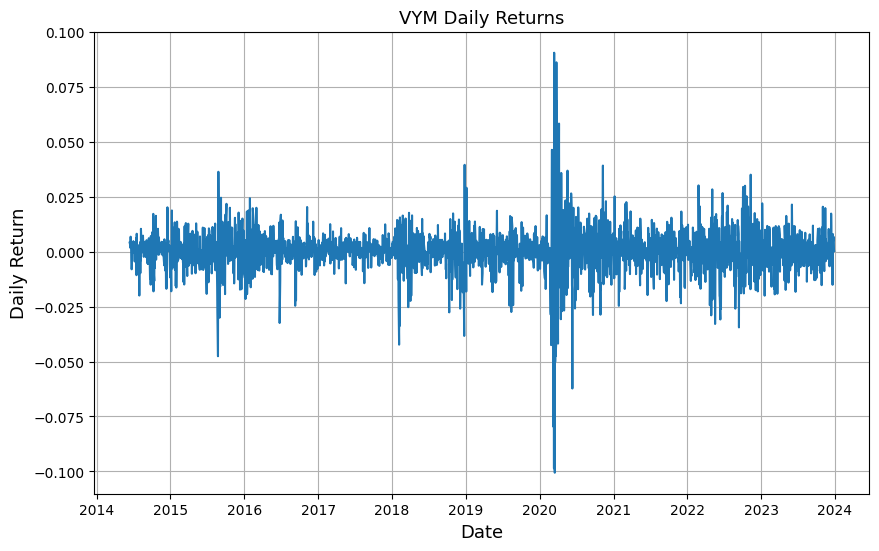

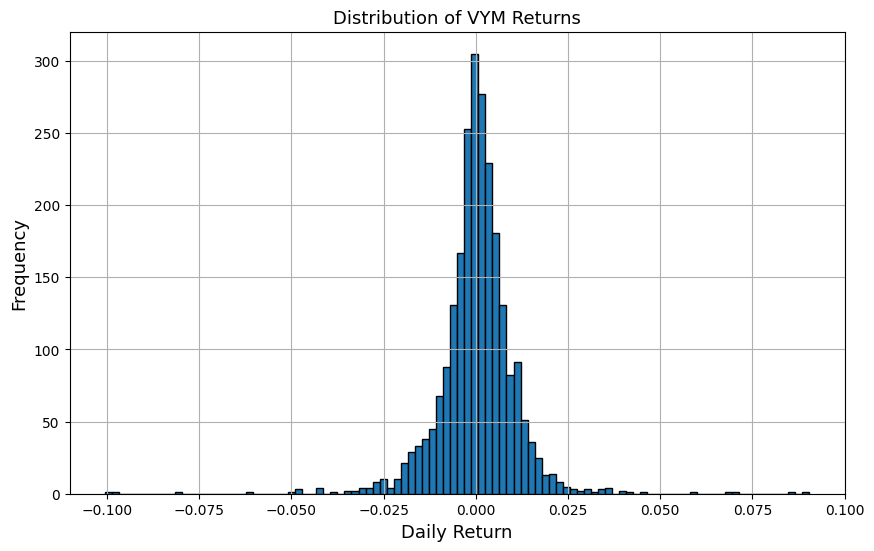

The average expected return percentage for VYM is: 0.0002766156516559725 or 0.0002766
The std or risk (or average volatility for daily returns)  percentage for VYM is: 0.010499710770481393 or 0.0104997
The average annualized volatility percentage for VYM: 0.1666777412208009 or 0.1666777


In [29]:
# Perform the visualization in a single graph
vym['Daily Returns'] = ((vym['Close']) - (vym['Close'].shift(1)))/(vym['Close'].shift(1))
vym['Daily Returns'] = vym['Daily Returns'].dropna()

# Volatility
volatility = vym['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(vym.index, vym['Daily Returns'])
plt.title('VYM Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(vym['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of VYM Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = vym['Daily Returns'].mean()
sd = vym['Daily Returns'].std()
av = annualized_volatility

print('The average expected return percentage for VYM is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns)  percentage for VYM is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for VYM: ' + str(av) + ' or ' + str(round(av, 7)))

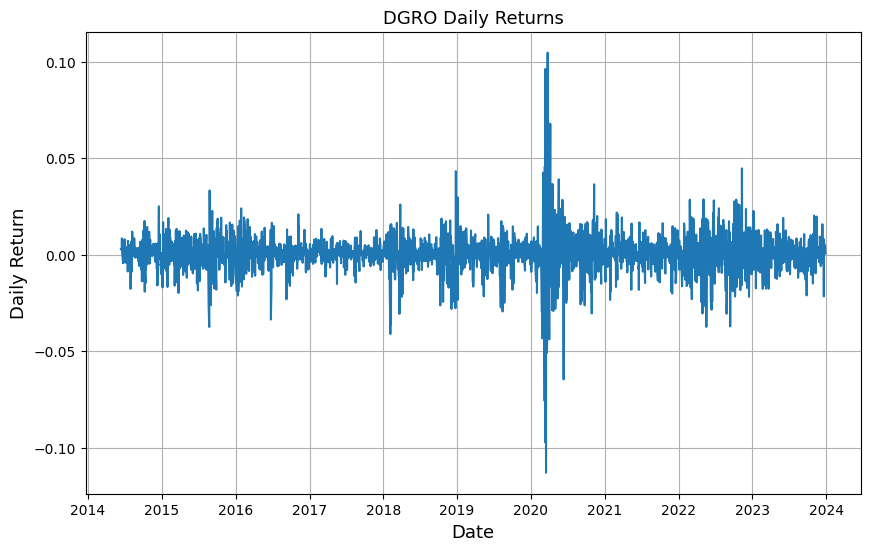

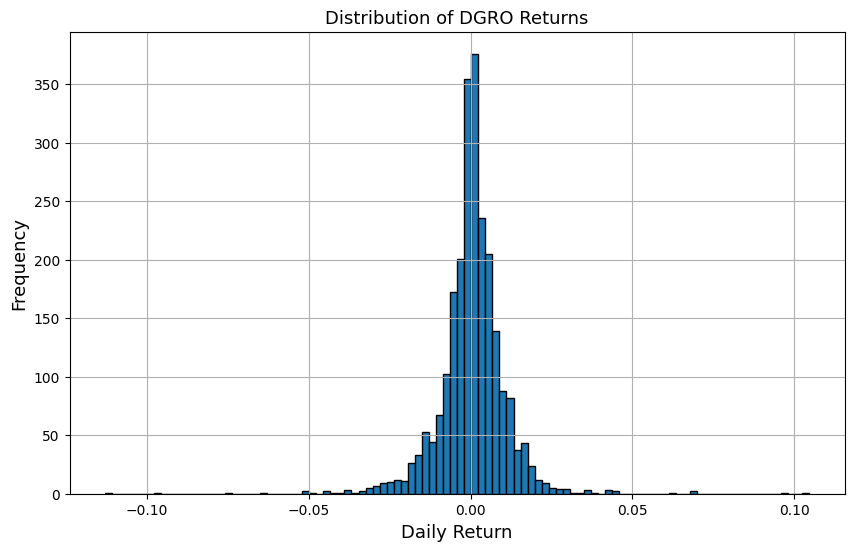

The average expected return percentage for DGRO is: 0.0003833034268680841 or 0.0003833
The std or risk (or average volatility for daily returns) percentage for DGRO is: 0.01077244403891559 or 0.0107724
The average annualized volatility percentage for DGRO: 0.17100724763598515 or 0.1710072


In [30]:
# Perform the visualization in a single graph
dgro['Daily Returns'] = ((dgro['Close']) - (dgro['Close'].shift(1)))/(dgro['Close'].shift(1))
dgro['Daily Returns'] = dgro['Daily Returns'].dropna()

# Volatility
volatility = dgro['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(dgro.index, dgro['Daily Returns'])
plt.title('DGRO Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(dgro['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of DGRO Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = dgro['Daily Returns'].mean()
sd = dgro['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for DGRO is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for DGRO is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for DGRO: ' + str(av) + ' or ' + str(round(av, 7)))

### Mean or expected return percentage for each fund goes as SCHD (0.0004377) > DGRO (0.0003833) > VYM (0.0002766) > IWD (0.0002746)
### STD or risk (or average volatility for daily returns) percentage goes as IWD (0.0111662) > DGRO (0.0107724) > SCHD (0.0106733) > VYM (0.0104997)
### The average annualized volatility percentage goes as IWD (0.1772582) > DGRO (0.1710072) > SCHD (0.1694339) > VYM (0.1666777)
### In conclusion, all Return Histograms appear to have outliers (abnormally large spikes from daily return graphs), which is expected. The index fund with historically the highest return & the lowest risk is SCHD, followed by DGRO, then VYM, and IWD has the less returns with highest level of risk. For annualized volatility, VTI is also the most volatile. Please note that this doesn't determine exact dividend amounts. Note that DGRO was launched in 2014 and SCHD was launched in 2011. SCHD has more historical that reflects consistent returns (see Market Cap Graph), but is is possible that DGRO could outperform SCHD in the upcoming years. Note that these models are not prediction models.

# Step 11 - Correlations: Create Correlation Tables of the Index Fund's own Variables 

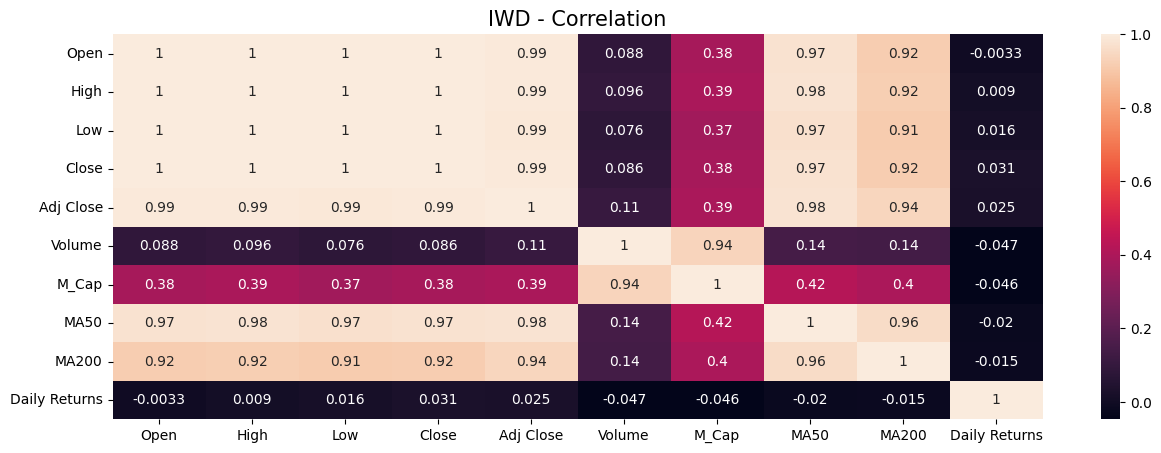

In [31]:
# Correlation table for IWD
iwd_corr = iwd.corr() 

# Heatmap for IWD
plt.figure(figsize=(15,5))
sns.heatmap(iwd_corr, annot=True)

# Header
plt.title('IWD - Correlation', fontsize=15)
plt.show()

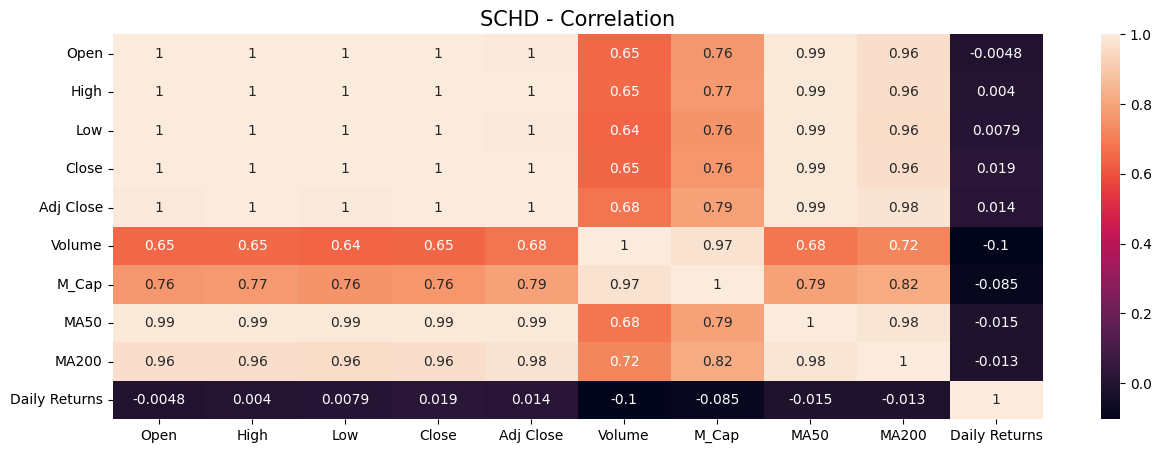

In [32]:
# Correlation table for SCHD
schd_corr = schd.corr() 

# Heatmap for SCHD
plt.figure(figsize=(15,5))
sns.heatmap(schd_corr, annot=True)

# Header
plt.title('SCHD - Correlation', fontsize=15)
plt.show()

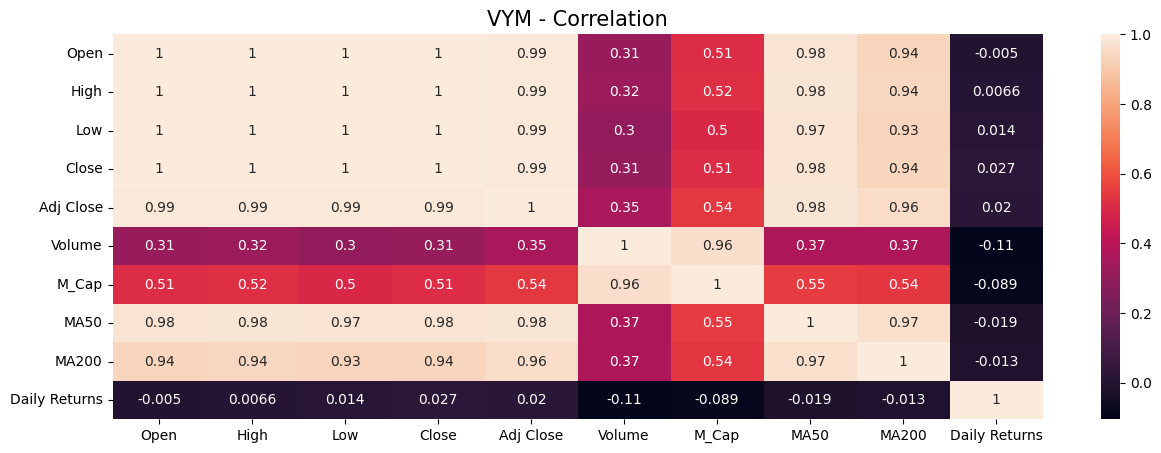

In [33]:
# Correlation table for VYM
vym_corr = vym.corr() 

# Heatmap for VYM
plt.figure(figsize=(15,5))
sns.heatmap(vym_corr, annot=True)

# Header
plt.title('VYM - Correlation', fontsize=15)
plt.show()

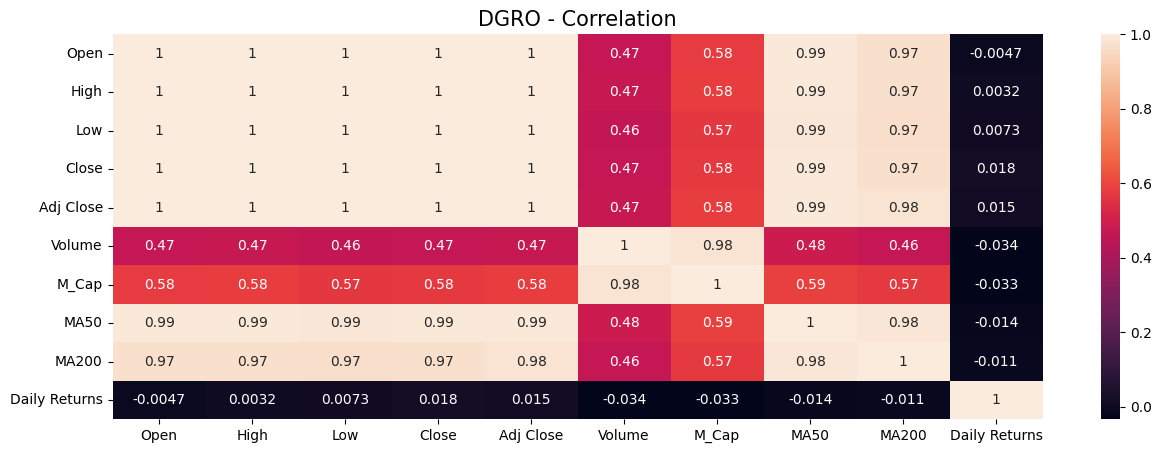

In [34]:
# Correlation table for DGRO
dgro_corr = dgro.corr() 

# Heatmap for DGRO
plt.figure(figsize=(15,5))
sns.heatmap(dgro_corr, annot=True)

# Header
plt.title('DGRO - Correlation', fontsize=15)
plt.show()

### For the given data, the heatmaps shows us that for the 4 ETFs, volume is positively correlated to Open, High, Low, Close, and Adj Close. What correlation means is that if Volume was to increase, then it is more likely for prices to go up and vice-versa.

# Step 12 - Correlation among Index Funds

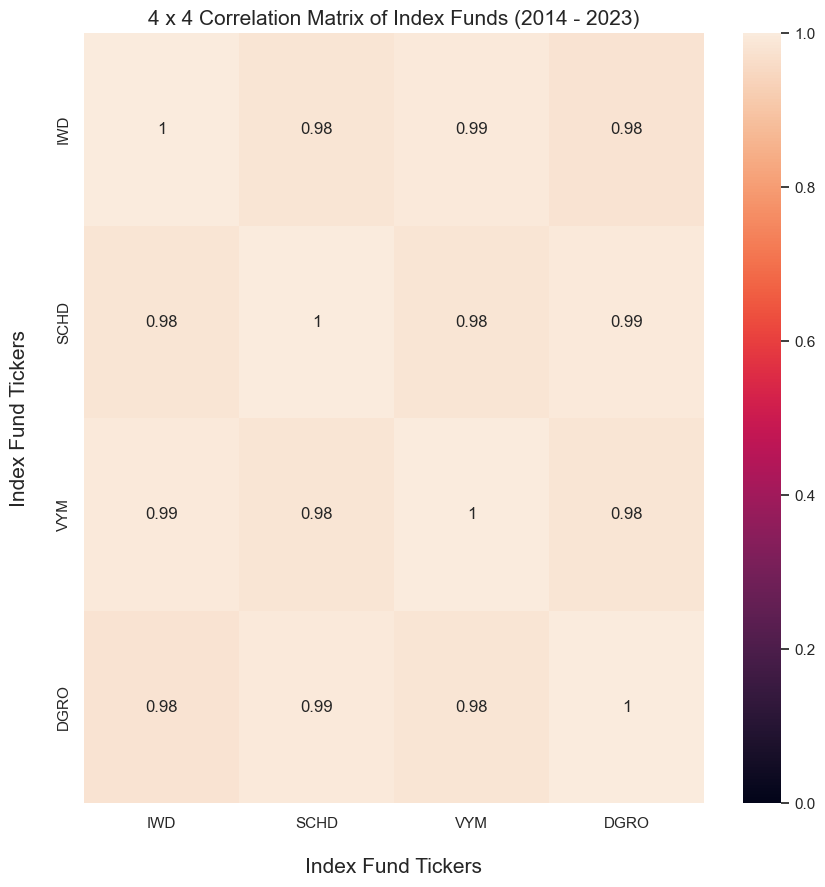

In [35]:
close_prices = pd.DataFrame()
for ticker in tickers:
    close_prices[ticker] = data[ticker]['Close']

corr_matrix = close_prices.corr()

sns.set(style= 'white')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, ax=ax)

# set the axis labels and title
ax.set_xlabel('Index Fund Tickers', labelpad=20, fontsize=15)
ax.set_ylabel('Index Fund Tickers', labelpad=20, fontsize=15)
ax.set_title('4 x 4 Correlation Matrix of Index Funds (2014 - 2023)', fontsize=15);

### The 4-by-4 matrix shows that these index funds are highly correlated! The reason being that most of these funds are NOT diversifying away. Although using a correlation coefficient on its own may not help to predict future stock returns, we know that these funds will move (or trend) in the same direction. Recall that index funds are basically a collection of stocks. Most of these stocks are hold within the 4 funds are the same, therefore behavior will be almost identical - that is why the high/ low/ open price trends are almost identical despite that the funds are weighted differently.

### The correlation of zero (0) is possible when the price movement of Schwab US Dividend has no effect on the direction of Vanguard High i.e., Vanguard High and Schwab US go up and down completely randomly.

# Conclusion - What Should I Invest In?

Due that the 4 ETFs have low volatility, favorable trend patterns (upward - increasing value as time passes), & overrall low risk / great return ratio, any of these stocks would be worth buying and holding for many years. The only exception would be IWD. The reason being that it has the highest expense ratio among the 4 ETFs, despite having slightly better returns - on the long term, a high expense ratio is an important variable to keep in mind as as a passive investor looking for long-term growth, because it adds up throughout the years. IWD would be a good investment for a short period of time.

As we noticed on the Market Cap graph, SCHD has the best performance on the long term compared to VYM (2nd) & DGRO (3rd). Remember that SCHD, VYM & DGRO are dividend ETFs, and although DGRO is the least volatile and hence it has the least amount of risk, SCHD is currently (as in December 2023) a better investment as best performance (Market Cap) translates into a higher dividend yield. However, it is possible that in the future DGRO outperforms both SCHD & VYM, however historical data doesn't reflect that yet, maybe it will in a couple of years. Note that the 3 previously mentioned Dividend ETFs have low expense-ratios, which is essential for 'buying & holding' strategies.

Note that when it comes to trending directions, since these 4 ETFs are highly correlated, this will move upward or downward depending on the economy (meaning that if there's a downturn - all of these will fall at the same time).

### Based on these facts the best long-term investment options (in order from greatest to least) within the 'Large Value' fund category (High Yield Dividend Funds) for passive investors are: 
1. SCHD
2. VYM
3. DGRO
4. IWD